<a href="https://colab.research.google.com/github/Osval-13/COM300_Laboratorio_02/blob/main/Laboratorio_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio N°2

**Universitario:** Pinto Barrón Osvaldo Dennis.
**Carrera:** Ingeniería en Diseño y Animación Digital.

**Temática del dataset:** Predicción de la salud física de una persona que fuma.

**Enlace del dataset:**  [Smoker Status Prediction](https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction/data)

**Formato:** El dataset consta de 22 columnas, de las cuales únicamente se hará uso de 15. El número total de filas es de 16709 datos.

Columnas usadas para la realización de los tres métodos:

**Variables de entrada**
1.   Edad.
2.   Altura (cm).
3.   Peso (kg).
4.   Cintura (cm).
5.   Vista (derecha).
6.   Vista (izquierda).
7.   Sistólica.
8.   Relajación.
9.  Azúcar en la sangre.
10.  Colesterol.
11.  Triglicérido.
12.  HDL.
13.  LDL.
14.  Hemoglobina.

**Variable de salida**
15.   ATS.




# 1 Regresión Lineal Multivariable

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Análisis y manipulación de datos
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

### 1.1 Modificamos los datos del dataset

Cargamos el dataset original con la librería **pandas** para eliminar los datos de entrada que no usaremos y guardamos los resultados dentro de un nuevo archivo.

In [2]:
# Cargar datos del dataset original
data = pd.read_csv('/content/test_dataset.csv', delimiter=',')
df = pd.DataFrame(data)
data.info()

# Eliminamos las columnas que no usaremos
sin = df.drop(df.columns[[6, 7, 16, 17, 18, 20, 21]], axis=1)

# Verificamos los cambios en el dataset
sin.info()

# Guardamos el dataset modificado en un nuevo archivo CSV
sin.to_csv('test_modificado.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16708 entries, 0 to 16707
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  16708 non-null  int64  
 1   height(cm)           16708 non-null  int64  
 2   weight(kg)           16708 non-null  int64  
 3   waist(cm)            16708 non-null  float64
 4   eyesight(left)       16708 non-null  float64
 5   eyesight(right)      16708 non-null  float64
 6   hearing(left)        16708 non-null  int64  
 7   hearing(right)       16708 non-null  int64  
 8   systolic             16708 non-null  int64  
 9   relaxation           16708 non-null  int64  
 10  fasting blood sugar  16708 non-null  int64  
 11  Cholesterol          16708 non-null  int64  
 12  triglyceride         16708 non-null  int64  
 13  HDL                  16708 non-null  int64  
 14  LDL                  16708 non-null  int64  
 15  hemoglobin           16708 non-null 

### 1.2 Cargamos los datos del dataset modificado

Cargamos los datos del dataset modificado para asignarles los datos de entrada para ***X*** y el dato de salida para ***y***.

In [55]:
data = pd.read_csv('/content/test_modificado.csv', delimiter=',')
df = pd.DataFrame(data)

# Asignamos los valores de X y de Y
X = data.iloc[:, :14]
y = data.iloc[:, 14]

# Asignamos una variable para el número total de los datos
m = y.size
print(m)

# Imprimir algunos datos dentro de una tabla
display(data)

16708


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,ALT
0,40,170,65,75.1,1.0,0.9,120,70,102,225,260,41,132,15.7,26
1,45,170,75,89.0,0.7,1.2,100,67,96,258,345,49,140,15.7,28
2,30,180,90,94.0,1.0,0.8,115,72,88,177,103,53,103,13.5,29
3,60,170,50,73.0,0.5,0.7,118,78,86,187,70,65,108,14.1,28
4,30,170,65,78.0,1.5,1.0,110,70,87,190,210,45,103,14.7,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,60,165,65,82.0,0.7,1.0,101,68,140,177,131,41,110,13.5,75
16704,60,155,70,93.0,0.8,1.0,134,70,97,165,259,53,60,13.9,28
16705,40,155,50,67.2,0.9,0.8,134,80,91,206,50,64,131,13.4,10
16706,35,165,70,76.1,1.0,1.0,114,68,109,201,43,74,118,14.3,28


### 1.3 Normalizamos las características

Realizamos una copia para almacenar los datos y así guardarlos dentro de un vector que contendrá la media de cada característica.

In [56]:
def  featureNormalize(X): #Normalización de todos los datos

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Llamamos a la función para normalizar los datos.

In [57]:
X_norm, mu, sigma = featureNormalize(X)

# Imprimimos los resultados
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

Media calculada: age                     44.312006
height(cm)             164.555602
weight(kg)              65.692782
waist(cm)               82.009792
eyesight(left)           1.007182
eyesight(right)          1.004351
systolic               121.537587
relaxation              76.029148
fasting blood sugar     99.242459
Cholesterol            196.943261
triglyceride           126.470254
HDL                     57.283816
LDL                    114.691525
hemoglobin              14.618692
dtype: float64
Desviación estandar calculada: age                    12.088737
height(cm)              9.210436
weight(kg)             12.638877
waist(cm)               9.150275
eyesight(left)          0.458486
eyesight(right)         0.467126
systolic               13.751347
relaxation              9.726998
fasting blood sugar    21.147759
Cholesterol            36.166900
triglyceride           71.256909
HDL                    15.017806
LDL                    35.947898
hemoglobin              1.559747

### 1.4 Descenso por el gradiente

Añadimos una columna de valores de 1 e imprimos los datos.

In [58]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -0.35669616  0.59111183 ... -1.08430064  0.48148782
   0.69325889]
 [ 1.          0.05691196  0.59111183 ... -0.55159964  0.70403212
   0.69325889]
 [ 1.         -1.18391242  1.67683673 ... -0.28524914 -0.32523529
  -0.71722642]
 ...
 [ 1.         -0.35669616 -1.03747551 ...  0.44721473  0.45366978
  -0.78133939]
 [ 1.         -0.77030429  0.04824939 ...  1.11309098  0.09203528
  -0.20432267]
 [ 1.         -1.59752055  1.67683673 ... -0.28524914 -0.79814194
   0.82148483]]


#### 1.4.1 Calculamos el costo (J)

In [63]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [64]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 1.4.2 Seleccionando coheficientes de aprendizaje

Declaramos un valor para **alpha** y un **número de iteraciones** para así calcular las thetas.

In [65]:
# Elegir algun valor para alpha
alpha = 0.004
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(15)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por gradiente:')
for i, val in enumerate(theta, 1):
    print(f'Theta {i}: {val:.6f}')

Theta calculado por el descenso por gradiente:
Theta 1: 26.781202
Theta 2: -1.124603
Theta 3: -2.995793
Theta 4: 3.378448
Theta 5: 3.469512
Theta 6: -0.120126
Theta 7: -0.040505
Theta 8: -0.397374
Theta 9: 0.635655
Theta 10: 0.905880
Theta 11: 0.551271
Theta 12: 1.784888
Theta 13: -0.204278
Theta 14: -0.161867
Theta 15: 3.629165


#### 1.4.3 Gráfica
Graficamos la convergencia del costo.

Text(0, 0.5, 'Costo J')

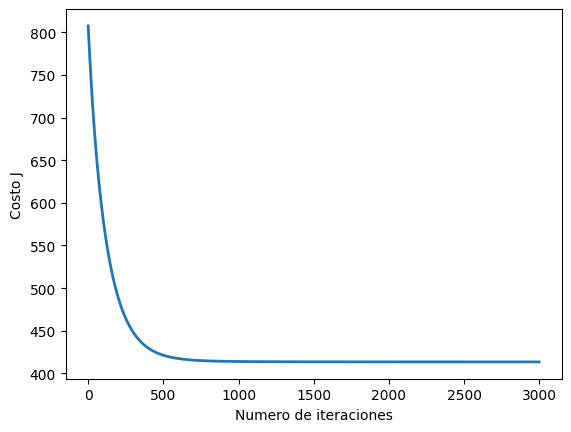

In [66]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

### 1.5 Predicciones
Hacemos uso de un diccionario para definir valores mínimos y máximos de las características. De esta forma se obtendrán valores controlados.

In [17]:
rango_columnas = {
    'XT': (1,1),
    'Edad': (30,70),
    'Altura': (145, 179),
    'Peso': (60, 87),
    'Cintura': (50, 100),
    'Vista Derecha': (0.1, 4),
    'Vista Izquierda': (0.1, 3),
    'Sistólica': (95, 151),
    'Relajación': (60, 95),
    'Azúcar en la sangre': (77.5, 122.5),
    'Colesterol': (131.8, 240),
    'Triglicérido': (90, 275),
    'HDL': (35, 100),
    'LDL': (60, 166),
    'Hemoglobina': (12.5, 16.9)
}

Creamos una lista para almacenar cada uno de los valores y realizamos el cálculo de las 100 predicciones.

In [22]:
# Crear una lista para almacenar las predicciones
predicciones = []

Ciclos = 100

# Generar 100 predicciones
for i in range(Ciclos):
    # Crear un array para almacenar los valores aleatorios de cada columna
    X_nuevo = []

    # Tomamos en cuenta que la primera columna siempre tendrá un valor de 1
    X_nuevo.append(1)

    # Generar valores aleatorios entre los rangos definidos para las demás columnas
    for col in rango_columnas:
      if col != 'XT':
        min_val = rango_columnas[col][0]
        max_val = rango_columnas[col][1]
        valor_random = np.random.uniform(min_val, max_val)
        X_nuevo.append(valor_random)

    # Convertir la lista a un array
    X_nuevo = np.array(X_nuevo)


    # Realizar la predicción
    ATS = int(np.dot(X_nuevo , theta))

    # Almacenar la predicción
    predicciones.append(ATS)

# Mostrar las 100 predicciones
for i, pred in enumerate(predicciones, 1):
    print(f"Predicción {i}: El valor estimado de ATS es {pred}")

Predicción 1: El valor estimado de ATS es 639
Predicción 2: El valor estimado de ATS es 345
Predicción 3: El valor estimado de ATS es 631
Predicción 4: El valor estimado de ATS es 456
Predicción 5: El valor estimado de ATS es 617
Predicción 6: El valor estimado de ATS es 586
Predicción 7: El valor estimado de ATS es 609
Predicción 8: El valor estimado de ATS es 664
Predicción 9: El valor estimado de ATS es 436
Predicción 10: El valor estimado de ATS es 541
Predicción 11: El valor estimado de ATS es 644
Predicción 12: El valor estimado de ATS es 520
Predicción 13: El valor estimado de ATS es 465
Predicción 14: El valor estimado de ATS es 567
Predicción 15: El valor estimado de ATS es 400
Predicción 16: El valor estimado de ATS es 397
Predicción 17: El valor estimado de ATS es 659
Predicción 18: El valor estimado de ATS es 602
Predicción 19: El valor estimado de ATS es 617
Predicción 20: El valor estimado de ATS es 586
Predicción 21: El valor estimado de ATS es 442
Predicción 22: El valo

# 2 Regresión Polinómica


### 2.1 Cargamos los datos del dataset modificado

Cargamos los datos del dataset modificado para asignarles los datos de entrada para ***X_pol*** y el dato de salida para ***y_pol***. Además, cambiamos el nombre de las variables para evitar fallos.

In [24]:
data = pd.read_csv('/content/test_modificado.csv', delimiter=',')
df = pd.DataFrame(data)

# Asignamos los valores de X y de Y
X_pol = data.iloc[:, :14]
y_poli = data.iloc[:, 14]

# Asignamos una variable para el número total de los datos
m_poli = y.size
print(m)

16708


In [25]:
X_pol = np.concatenate([X_pol, X_pol * X_pol], axis=1)

### 2.2 Normalizamos las características

Realizamos una copia para almacenar los datos y así guardarlos dentro de un vector que contendrá la media de cada característica.

In [26]:
def  featureNormalize(X):
    X_norm_pol = X_pol.copy()
    mu = np.zeros(X_pol.shape[1])
    sigma = np.zeros(X_pol.shape[1])

    mu = np.mean(X_pol, axis = 0)
    sigma = np.std(X_pol, axis = 0)
    X_norm_pol = (X_pol - mu) / sigma

    return X_norm_pol, mu, sigma

Llamamos a la función de normalizar.

In [27]:
X_norm_pol, mu, sigma = featureNormalize(X)

# Imprimimos los resultados
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm_pol)

Media calculada: [4.43120062e+01 1.64555602e+02 6.56927819e+01 8.20097917e+01
 1.00718219e+00 1.00435121e+00 1.21537587e+02 7.60291477e+01
 9.92424587e+01 1.96943261e+02 1.26470254e+02 5.72838161e+01
 1.14691525e+02 1.46186916e+01 2.10969147e+03 2.71633783e+04
 4.47528280e+03 6.80933348e+03 1.22462533e+00 1.22692782e+00
 1.49604846e+04 5.87504579e+03 1.02962933e+04 4.00946926e+04
 2.10722721e+04 3.50697007e+03 1.44463973e+04 2.16138956e+02]
Desviación estandar calculada: [1.20887373e+01 9.21043631e+00 1.26388767e+01 9.15027534e+00
 4.58485953e-01 4.67125752e-01 1.37513475e+01 9.72699771e+00
 2.11477593e+01 3.61669001e+01 7.12569088e+01 1.50178055e+01
 3.59478982e+01 1.55974683e+00 1.12373533e+03 3.02123956e+03
 1.75582085e+03 1.52165260e+03 3.57547363e+00 3.72838706e+00
 3.45251064e+03 1.52035706e+03 6.73286564e+03 1.48153163e+04
 2.53490764e+04 3.45893165e+03 2.39941949e+04 4.42612063e+01]
[[-0.35669616  0.59111183 -0.05481357 ... -0.52790002  0.1240968
   0.68572565]
 [ 0.05691196  0

### 2.3 Descenso por el gradiente

Añadimos una columna de valores de 1.

In [28]:
X_pol = np.concatenate([np.ones((m, 1)), X_norm_pol], axis=1)

#### 2.3.1 Calculamos el costo (J)

In [29]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m_pol = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X_pol, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X_pol, theta) - y))

    return J

In [30]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m_pol = y.shape[0]

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m_pol) * (np.dot(X_pol, theta) - y_poli).dot(X)
        J_history.append(computeCostMulti(X_pol, y_poli, theta))

    return theta, J_history

#### 2.3.2 Seleccionando coheficientes de aprendizaje

Declaramos un valor para **alpha** y un **número de iteraciones** para así calcular las thetas.

In [31]:
# Elegir algun valor para alpha
alpha = 0.004
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(29)
theta, J_history = gradientDescentMulti(X_pol, y_poli, theta, alpha, num_iters)

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por gradiente:')
for i, val in enumerate(theta, 1):
    print(f'Theta {i}: {val:.6f}')

Theta calculado por el descenso por gradiente:
Theta 1: 26.781202
Theta 2: -0.244312
Theta 3: -1.654099
Theta 4: 0.413482
Theta 5: 0.856116
Theta 6: -0.017596
Theta 7: -0.118775
Theta 8: -0.339246
Theta 9: 0.222283
Theta 10: 0.892029
Theta 11: -0.454977
Theta 12: 0.964434
Theta 13: -0.718566
Theta 14: -0.700250
Theta 15: 1.566302
Theta 16: -0.760491
Theta 17: -1.580205
Theta 18: 3.581439
Theta 19: 2.245103
Theta 20: -0.129393
Theta 21: 0.063915
Theta 22: -0.038470
Theta 23: 0.372749
Theta 24: -0.043042
Theta 25: 1.547649
Theta 26: 0.529633
Theta 27: 0.398908
Theta 28: 0.201433
Theta 29: 2.265587


#### 2.3.3 Gráfica
Graficamos la convergencia del costo.

Text(0, 0.5, 'Costo J')

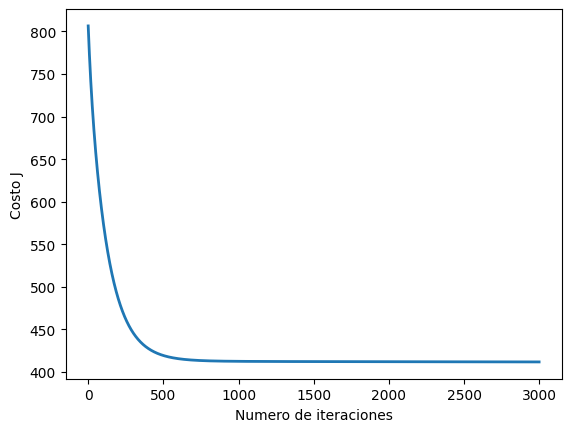

In [32]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

### 2.4 Predicciones
Hacemos uso de un diccionario para definir valores mínimos y máximos de las características. De esta forma se obtendrán valores controlados.

In [33]:
rango_columnas = {
    'XT': (1,1),
    'Edad': (30,70),
    'Altura': (145, 179),
    'Peso': (60, 87),
    'Cintura': (50, 100),
    'Vista Derecha': (0.1, 4),
    'Vista Izquierda': (0.1, 3),
    'Sistólica': (95, 151),
    'Relajación': (60, 95),
    'Azúcar en la sangre': (77.5, 122.5),
    'Colesterol': (131.8, 240),
    'Triglicérido': (90, 275),
    'HDL': (35, 100),
    'LDL': (60, 166),
    'Hemoglobina': (12.5, 16.9)
}

Creamos una lista para almacenar cada uno de los valores y realizamos el cálculo de las 100 predicciones.

In [34]:
# Crear una lista para almacenar las predicciones
predicciones = []

Ciclos = 100


# Generar 100 predicciones
for i in range(Ciclos):
    # Crear un array para almacenar los valores aleatorios de cada columna
    X_nuevo = []

    valores_orginal = []
    valores_cuadraticos = []
    # Tomamos en cuenta que la primera columna siempre tendrá un valor de 1
    X_nuevo.append(1)

    # Generar valores aleatorios entre los rangos definidos para las demás columnas
    for col in rango_columnas:
      if col != 'XT':
        min_val = rango_columnas[col][0]
        max_val = rango_columnas[col][1]
        valor_random = np.random.uniform(min_val, max_val)
        X_nuevo.append(valor_random)
        valores_orginal.append(valor_random)
        valores_cuadraticos.append(valor_random **2)

    # Concatenar amos arrays
    X_nuevo.extend(valores_cuadraticos)

    # Convertir la lista a un array
    X_nuevo = np.array(X_nuevo)

    # Realizar la predicción
    ATS = int(np.dot(X_nuevo, theta))

    # Almacenar la predicción
    predicciones.append(ATS)

# Mostrar las 100 predicciones
for i, pred in enumerate(predicciones, 1):
    print(f"Predicción {i}: El valor estimado de ATS es {pred}")

Predicción 1: El valor estimado de ATS es 71071
Predicción 2: El valor estimado de ATS es 66657
Predicción 3: El valor estimado de ATS es 69436
Predicción 4: El valor estimado de ATS es 75726
Predicción 5: El valor estimado de ATS es 51226
Predicción 6: El valor estimado de ATS es 94591
Predicción 7: El valor estimado de ATS es 49289
Predicción 8: El valor estimado de ATS es 84618
Predicción 9: El valor estimado de ATS es 59603
Predicción 10: El valor estimado de ATS es 52195
Predicción 11: El valor estimado de ATS es 96915
Predicción 12: El valor estimado de ATS es 90415
Predicción 13: El valor estimado de ATS es 66945
Predicción 14: El valor estimado de ATS es 83630
Predicción 15: El valor estimado de ATS es 54067
Predicción 16: El valor estimado de ATS es 68421
Predicción 17: El valor estimado de ATS es 69248
Predicción 18: El valor estimado de ATS es 118812
Predicción 19: El valor estimado de ATS es 129407
Predicción 20: El valor estimado de ATS es 76712
Predicción 21: El valor est

# 3 Ecuacion de la Normal


### 3.1 Cargamos los datos del dataset modificado

Cargamos los datos del dataset modificado para asignarles los datos de entrada para ***X_normal*** y el dato de salida para ***y_normal***.

In [35]:
data = pd.read_csv('/content/test_modificado.csv', delimiter=',')
df = pd.DataFrame(data)

# Asignamos los valores de X y de Y
X_normal = data.iloc[:, :14]
y_normal = data.iloc[:, 14]

# Asignamos una variable para el número total de los datos
m_normal = y.size
print(m)

16708


Añadimos una columna de valores de 1.

In [36]:
X_normal = np.concatenate([np.ones((m_normal, 1)), X_normal], axis=1)

## 3.2 Aplicación de la función
Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [37]:
def normalEqn(X, y):

    theta_normal = np.zeros(X_normal.shape[1])

    theta_normal = np.dot(np.dot(np.linalg.inv(np.dot(X_normal.T,X_normal)),X_normal.T),y_normal)

    return theta_normal

## 3.3 Calculamos los valores de theta

In [38]:
# Calcula los parametros con la ecuación de la normal
theta_normal = normalEqn(X_normal, y_normal);

# Muestra los resultados la ecuación de la normal
print('Theta calculado por la ecuación de la normal:')
for i, val in enumerate(theta_normal, 1):
    print(f'Theta {i}: {val:.6f}')

Theta calculado por la ecuación de la normal:
Theta 1: -3.455646
Theta 2: -0.087891
Theta 3: -0.354786
Theta 4: 0.311947
Theta 5: 0.335463
Theta 6: -0.278517
Theta 7: -0.086355
Theta 8: -0.032136
Theta 9: 0.067598
Theta 10: 0.042981
Theta 11: 0.014412
Theta 12: 0.025069
Theta 13: -0.012823
Theta 14: -0.004254
Theta 15: 2.366245


## 3.4 Predicciones
Hacemos uso de un diccionario para definir valores mínimos y máximos de las características. De esta forma se obtendrán valores controlados.

In [39]:
rango_columnas = {
    'XT': (1,1),
    'Edad': (30,70),
    'Altura': (145, 179),
    'Peso': (60, 87),
    'Cintura': (50, 100),
    'Vista Derecha': (0.1, 4),
    'Vista Izquierda': (0.1, 3),
    'Sistólica': (95, 151),
    'Relajación': (60, 95),
    'Azúcar en la sangre': (77.5, 122.5),
    'Colesterol': (131.8, 240),
    'Triglicérido': (90, 275),
    'HDL': (35, 100),
    'LDL': (60, 166),
    'Hemoglobina': (12.5, 16.9)
}

Creamos una lista para almacenar cada uno de los valores y realizamos el cálculo de las 100 predicciones.

In [40]:
# Crear una lista para almacenar las predicciones
predicciones = []

Ciclos = 100

# Generar 100 predicciones
for i in range(Ciclos):
    # Crear un array para almacenar los valores aleatorios de cada columna
    X_nuevo = []

    # Tomamos en cuenta que la primera columna siempre tendrá un valor de 1
    X_nuevo.append(1)

    # Generar valores aleatorios entre los rangos definidos para las demás columnas
    for col in rango_columnas:
      if col != 'XT':
        min_val = rango_columnas[col][0]
        max_val = rango_columnas[col][1]
        valor_random = np.random.uniform(min_val, max_val)
        X_nuevo.append(valor_random)

    # Convertir la lista a un array
    X_nuevo = np.array(X_nuevo)

    # Realizar la predicción
    ATS = int(np.dot(X_nuevo, theta_normal))

    # Almacenar la predicción
    predicciones.append(ATS)

# Mostrar las 100 predicciones
for i, pred in enumerate(predicciones, 1):
    print(f"Predicción {i}: El valor estimado de ATS es {pred}")

Predicción 1: El valor estimado de ATS es 28
Predicción 2: El valor estimado de ATS es 16
Predicción 3: El valor estimado de ATS es 39
Predicción 4: El valor estimado de ATS es 31
Predicción 5: El valor estimado de ATS es 26
Predicción 6: El valor estimado de ATS es 34
Predicción 7: El valor estimado de ATS es 36
Predicción 8: El valor estimado de ATS es 29
Predicción 9: El valor estimado de ATS es 38
Predicción 10: El valor estimado de ATS es 42
Predicción 11: El valor estimado de ATS es 32
Predicción 12: El valor estimado de ATS es 16
Predicción 13: El valor estimado de ATS es 21
Predicción 14: El valor estimado de ATS es 37
Predicción 15: El valor estimado de ATS es 32
Predicción 16: El valor estimado de ATS es 34
Predicción 17: El valor estimado de ATS es 26
Predicción 18: El valor estimado de ATS es 25
Predicción 19: El valor estimado de ATS es 23
Predicción 20: El valor estimado de ATS es 37
Predicción 21: El valor estimado de ATS es 26
Predicción 22: El valor estimado de ATS es 